In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [21]:
# Load the dataset
df = pd.read_csv('data/mock_kaggle.csv') 
df.head(3)

,data,venda,estoque,preco
0,2014-01-01,0,4972,1.29
1,2014-01-02,70,4902,1.29
2,2014-01-03,59,4843,1.29


In [22]:
df.isnull().sum()

df.describe()


,venda,estoque,preco
count,937.000000,937.000000,937.000000
mean,90.533618,1608.258271,1.592572
std,80.682089,1356.691877,0.529502
min,0.000000,0.000000,0.000000
25%,33.000000,794.000000,1.290000
50%,76.000000,1348.000000,1.390000
75%,127.000000,1964.000000,1.890000
max,542.000000,7228.000000,2.980000


In [24]:
print(df.columns)



Index(['data', 'venda', 'estoque', 'preco'], dtype='object')


In [25]:
# Rename 'data' to 'date' 
df.rename(columns={'data': 'date'}, inplace=True)


In [26]:
df['date'] = pd.to_datetime(df['date'])


In [27]:
# Handle missing values
df['venda'] = df['venda'].fillna(0)  
df['preco'] = df['preco'].fillna(df['preco'].mean())  

df = df.dropna(subset=['estoque'])

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

# Save the cleaned data
df.to_csv('data/processed_sales_data.csv', index=False)
print("Data cleaning complete.")


Data cleaning complete.


In [30]:

df['venda'] = df['venda'].fillna(0)

df['preco'] = df['preco'].fillna(df['preco'].mean())


In [31]:
df = df.dropna(subset=['estoque'])

In [32]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

In [33]:
df.to_csv('data/processed_sales_data.csv', index=False)
print("Data cleaning complete.")

Data cleaning complete.


In [35]:

print(df.describe())

print(df.corr())


            venda      estoque       preco         year       month  \
count  937.000000   937.000000  937.000000   937.000000  937.000000   
mean    90.533618  1608.258271    1.592572  2014.844184    5.975454   
std     80.682089  1356.691877    0.529502     0.766033    3.349390   
min      0.000000     0.000000    0.000000  2014.000000    1.000000   
25%     33.000000   794.000000    1.290000  2014.000000    3.000000   
50%     76.000000  1348.000000    1.390000  2015.000000    6.000000   
75%    127.000000  1964.000000    1.890000  2015.000000    9.000000   
max    542.000000  7228.000000    2.980000  2016.000000   12.000000   

              day  day_of_week  is_weekend  
count  937.000000   937.000000  937.000000  
mean    15.734258     3.012807    0.287086  
std      8.811586     1.997821    0.452644  
min      1.000000     0.000000    0.000000  
25%      8.000000     1.000000    0.000000  
50%     16.000000     3.000000    0.000000  
75%     23.000000     5.000000    1.000000  


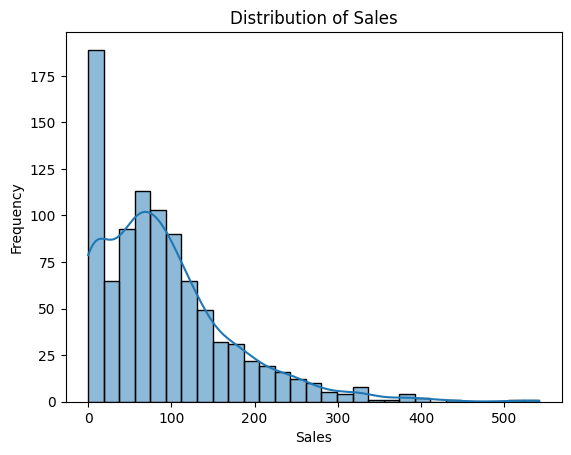

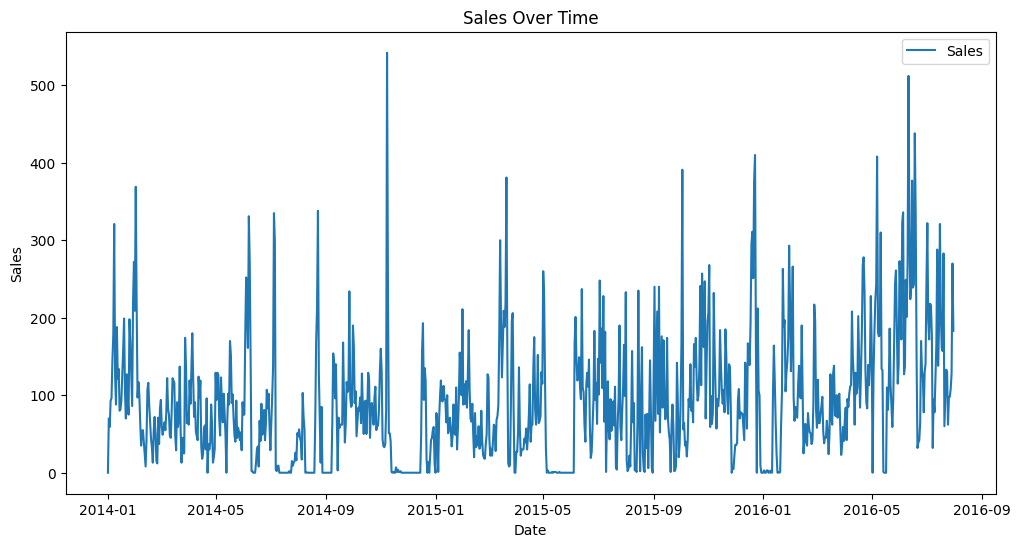

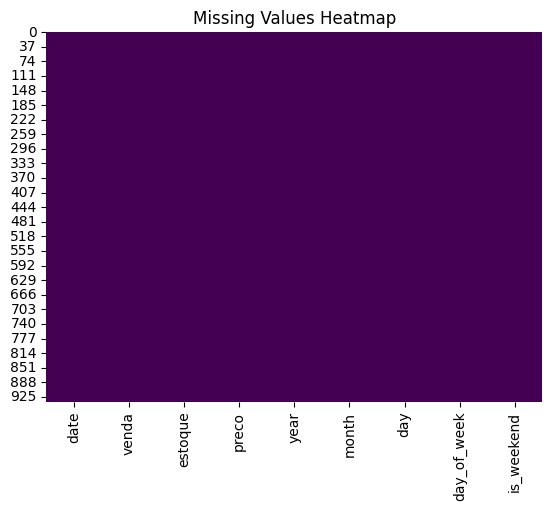

In [36]:
sns.histplot(df['venda'], kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12,6))
plt.plot(df['date'], df['venda'], label='Sales')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [37]:
df['rolling_sales'] = df['venda'].rolling(window=7).mean()

df['lag_sales'] = df['venda'].shift(1)

In [38]:
X = df[['year', 'month', 'day', 'day_of_week', 'is_weekend', 'estoque', 'preco', 'rolling_sales', 'lag_sales']]
y = df['venda']

X = X.dropna()
y = y.loc[X.index] 

In [39]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error: 3457.095597987529
R2 Score: 0.5669112867473008


In [44]:
joblib.dump(model, 'sales_prediction_model.pkl')

['sales_prediction_model.pkl']

In [61]:
df.columns



Index(['date', 'venda', 'estoque', 'preco', 'year', 'month', 'day',
       'day_of_week', 'is_weekend', 'rolling_sales', 'lag_sales'],
      dtype='object')

In [63]:
new_data = [[2024, 12, 19, 2, 1, 500, 20, 30, 40]]  

columns = ['year', 'month', 'day', 'day_of_week', 'is_weekend', 'estoque', 'preco', 'rolling_sales', 'lag_sales']
new_data_df = pd.DataFrame(new_data, columns=columns)

new_predictions = model.predict(new_data_df)

print(f'Predicted Sales: {new_predictions}')


Predicted Sales: [7.89699092]


In [64]:

df.to_csv('data/processed_sales_data_with_predictions.csv', index=False)
print("Final processed data with predictions saved.")


Final processed data with predictions saved.
